<center><img src="https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/AV.jpg?raw=true" width="60%" height="100" /></center>

<h1><center> Customer Churn</center><h1>

<center><img width=40% src="https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/bank_!.jpg?raw=true"></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  - **3.1** [**Version Check**](#Section31)
  - **3.2** [**Importing Libraries**](#Section32)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  - **5.2** [**Data Pre-Processing**](#Section52)<br>
  - **5.3** [**Data Post-profiling**](#Section53)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Post-Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Preparation**](#Section72)<br>
  - **7.3** [**Data Scaling**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

Please refer my techinal report in PDF form
https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/Customer%20churn.pdf

---
<a name = Section2></a>
# **2. Problem Statement**
---

- **The current process suffers from the following problems:**
  
In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.


<a name = Section21></a>
### **Your Role**

- You are given datasets of past customers and their Is_chur (1 or 0).

- Your task is to build a classification model using the datasets.


<a name = Section21></a>
### **Project Deliverables**
- Deliverable: **Whether the customer will churn in next 6 months or no**

- Machine Learning Task: **Classification.**

- Target Variable: **Is_Churn (Yes (1) / No (2))**
- Win Condition: **N/A (best possible model)**

<a name = Section21></a>
### **Evaluation Metric**

- The model evaluation will be based on the macro f1 score. 

<center><img src="https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/bank_cc.jpg?raw=true"></center>

---
<a name = Section3></a>
# **3. Importing Libraries**
---

<a name = Section31></a>
### **3.1 Version Check**

In [356]:
from platform import python_version

# Printing version of Python to ensure correct version is used for this project
print("python version", python_version())
#!pip list
#!pip show


python version 3.8.5


<a name = Section32></a>
### **3.2 Importing Libraries**

In [357]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd    # Importing for panel data analysis
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import sklearn.metrics
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression  
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
from sklearn.metrics import plot_roc_curve
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image


---
<a name = Section4></a>

<b><center><h1>Data Set</b></h1>
<br>

| ID | Feature Name | Description of the feature |
| :-- | :--| :--| 
|01| **ID**   | Unique Identifier of a row                          |
|02| **Age**|Age of the customer               |
|03| **Gender**        | Gender of the customer (Male and Female)           |
|04| **Income**          | Yearly income of the customer                     |
|05| **Balance**      | Average quarterly balance of the customer                 |
|06| **Vintage**           |No. of years the customer is associated with bank                                  |
|07| **Transaction_Status**     | Whether the customer has done any transaction in the past 3 months or not|
|08| **Product_Holdings**     | No. of product holdings with the bank|
|09| **Credit_Card**        | 	Whether the customer has a credit card or not                                         |
|10| **Credit_Category**          | Category of a customer based on the credit score                                 |
|11| **Is_Churn**         | Whether the customer will churn in next 6 months or not  |


- Load Customer Data to be used for Training and Validation

In [358]:
# ID is unique ID for customer 
df = pd.read_csv("https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/train_AV_Customer_churn.csv?raw=true")

# Get the dimesions of data
print('Shape of the Training and Validation dataset:', df.shape)

# Output first 5 data rows
df.head()


Shape of the Training and Validation dataset: (6650, 11)


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [359]:
#check if any duplicate row
any(df.duplicated())

False

<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [360]:
#year_last_moved is not relevant for statistical details but need to check count just to confirm
#Is_Churn is Target variable and has two category as 0 and 1
df.describe(include=[np.int64])

,Age,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,2.250226,0.515789,0.664361,0.231128
std,9.685747,1.458795,0.499788,0.472249,0.421586
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,2.000000,1.000000,1.000000,0.000000
75%,47.000000,3.000000,1.000000,1.000000,0.000000
max,72.000000,5.000000,1.000000,1.000000,1.000000


In [361]:
#Basic statistical details for numeric variables
df.describe(include=[np.float64])

,Balance
count,6.650000e+03
mean,8.045954e+05
std,5.157549e+05
min,6.300000e+01
25%,3.922642e+05
50%,7.649386e+05
75%,1.147124e+06
max,2.436616e+06


In [362]:
# Check for any missing values
any(df.isna().sum())

False

**Observations:**
- There is no missing values.
- Variables like **Transaction_Status**	,**Credit_Card**,	**Is_Churn** have values 0 and 1
- **Vintage** has values 0,1,2,3,4,5

In [363]:
#Basic statistical details for categorical variables
df.describe(include=[np.object])

,ID,Gender,Income,Product_Holdings,Credit_Category
count,6650,6650,6650,6650,6650
unique,6650,2,4,3,3
top,57c1bb33,Male,10L - 15L,1,Poor
freq,1,3612,1885,3200,3076


**Observations:**
- **Gender** have values **'Female', 'Male'**. Male are slightly more than Female
- **Income** has values **'5L - 10L', 'Less than 5L', 'More than 15L', '10L - 15L'**
- **Product_Holdings** has values **'1', '2', '3+'**. aximum occurance is of **1**
- **Credit_Category** has values **'Average', 'Poor', 'Good'**. Maximum occurance is of **Poor**

In [364]:
# Check any duplicate rows
df.duplicated().sum()

0

#### No duplicate rows

In [365]:
# Columns list can be handy and useful for further steps
df.columns

Index(['ID', 'Age', 'Gender', 'Income', 'Balance', 'Vintage',
       'Transaction_Status', 'Product_Holdings', 'Credit_Card',
       'Credit_Category', 'Is_Churn'],
      dtype='object')

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of the features**.

In [366]:
# Check column data types and any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


**Observations:**

- Total Non-Null count for each column is same as 6650 which means there is no missing values.

- There are **4 Categorical features**, **6 Numerical features** with 5 columns as integer feature as they contain numerical values.

In [367]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['ID', 'Gender', 'Income', 'Product_Holdings', 'Credit_Category']


In [368]:
for x in object_cols:
    print(x,":",df[x].unique())

ID : ['84e2fcc9' '57fea15e' '8df34ef3' ... 'd4075a95' '5855b142' '57b39511']
Gender : ['Female' 'Male']
Income : ['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
Product_Holdings : ['1' '2' '3+']
Credit_Category : ['Average' 'Poor' 'Good']


In [369]:
# Get list of numerical variables
s = (df.dtypes == 'int64')
numeric_cols = list(s[s].index)

print("Numeric variables INT:")
print(numeric_cols)

Numeric variables INT:
['Age', 'Vintage', 'Transaction_Status', 'Credit_Card', 'Is_Churn']


In [370]:
# Get list of numerical variables
s = (df.dtypes == 'float64')
numeric_cols = list(s[s].index)

print("Numeric variables Float:")
print(numeric_cols)

Numeric variables Float:
['Balance']


### **Numerical Data Distribution:**

- We shall plot all **numerical features to analyze the distribution** of their past.

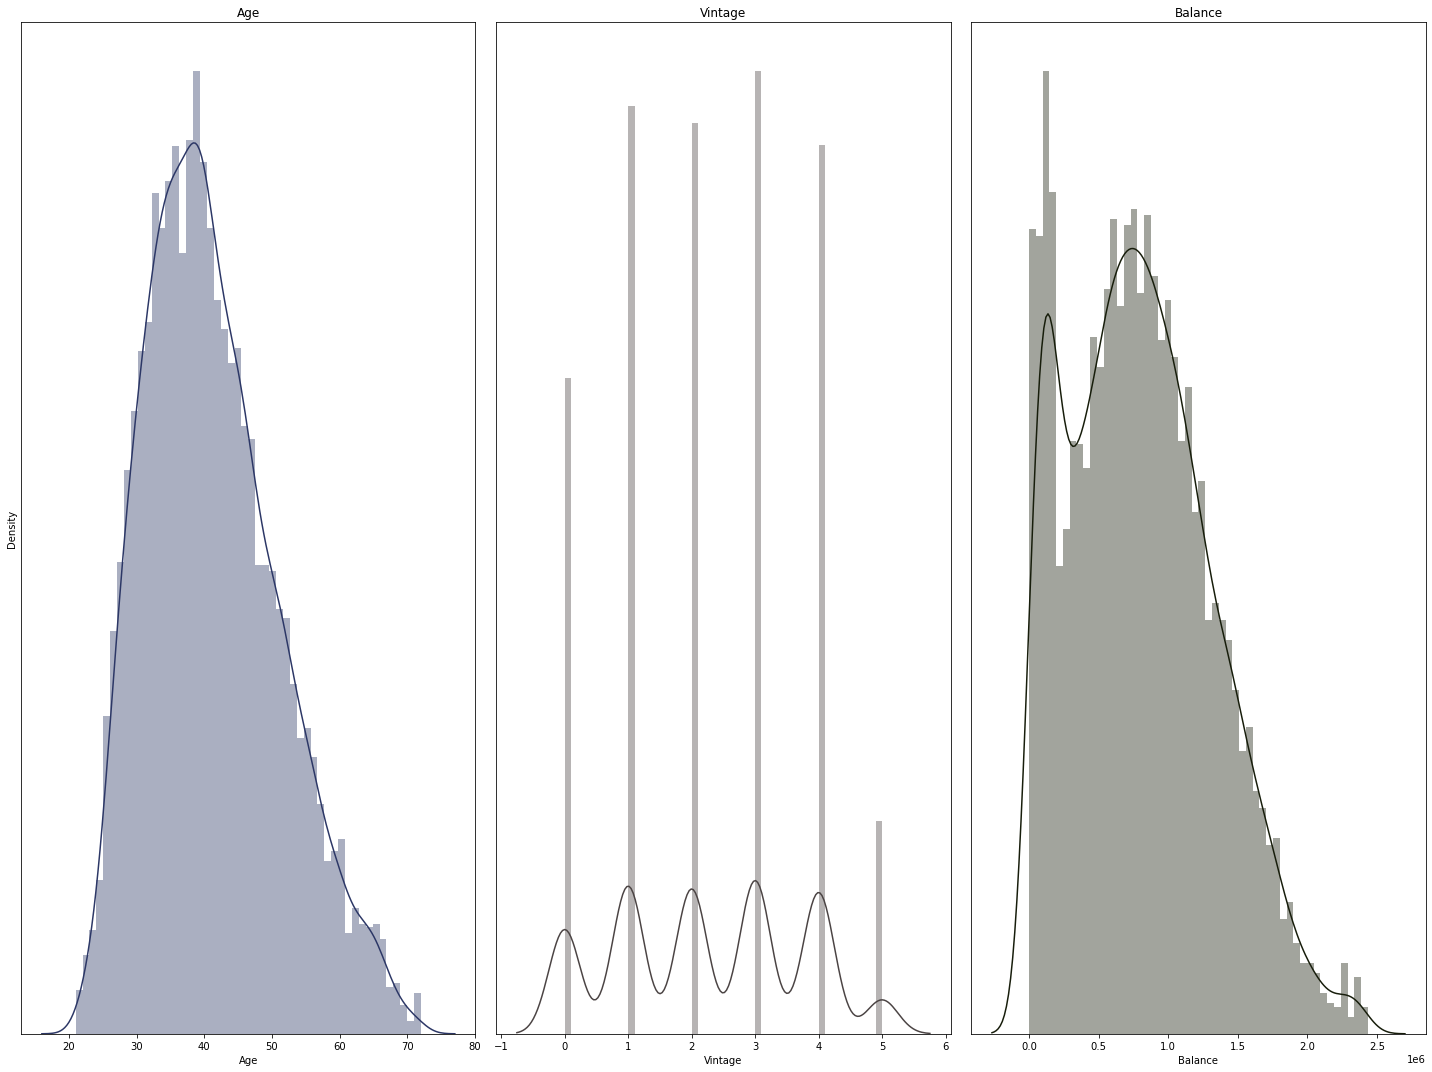

In [371]:
# For Random seed values
from random import randint
fig, axes = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize=(20, 15))
colors = []
for i in range(16):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
  columns=['Age', 'Vintage','Balance']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = df[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- **Slightly Postive Skewed Features: (Mean > Median)**
 - Age
 - Balance
 - Vintage



In [372]:
object_cols=object_cols[1:]

### **Categorical Data Distribution:**

- We shall plot all **categorical features to analyze the distribution** of the past data.


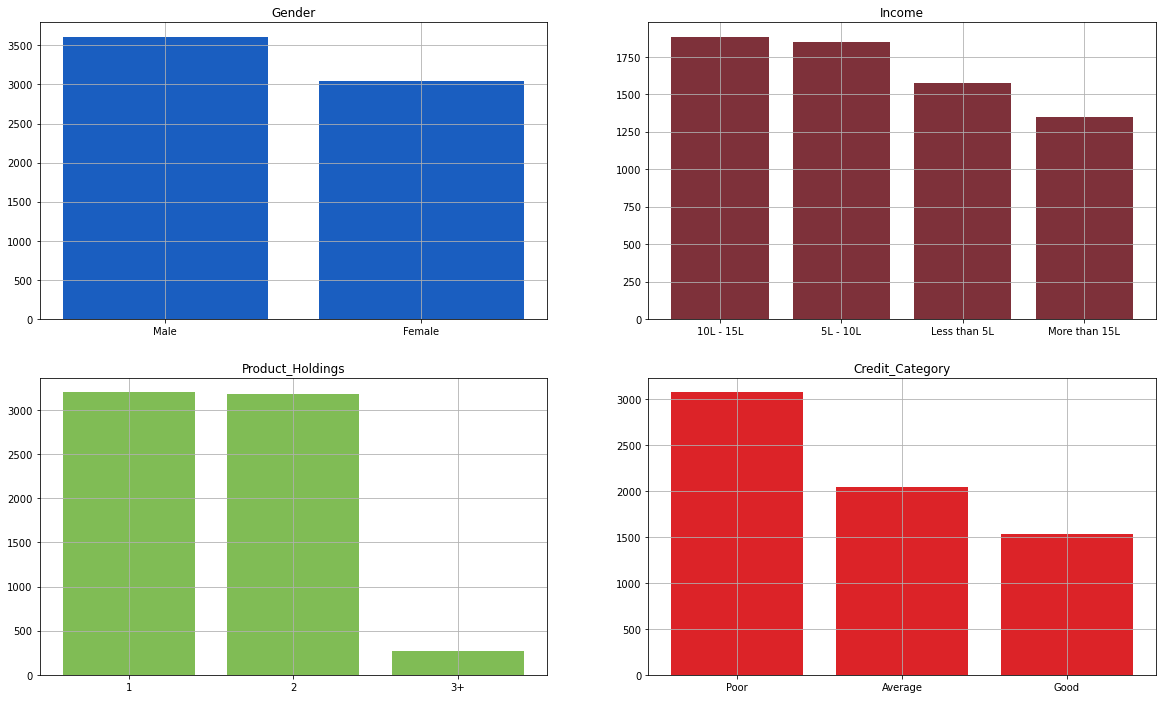

In [373]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = False, figsize=(20, 12))

colors = []
for i in range(14):
  colors.append('#%06X' % randint(0, 0xFFFFFF))

for ax, col, color in zip(axes.flat, object_cols, colors):
  ax.bar(x = df[col].value_counts().index, height = df[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  #ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observations:**

    - Male are slightly more than Female. 
    - Max Customer are between 5-15L. 
    - very less customers are 3+ Product Holdings. 
   

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

<a name = Section52></a>
### **5.2 Data Pre-Processing**

- There are no missing values and data appears clean so far but we need to pre process few features before EDA and Model Evaluation

<a name = Section53></a>
### **5.3 Data Post-Profiling**

- We can run the report to get latest information

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

**NOTE**:  

- Exploratory Data Analysis will explore all the features and their relationship with other features
- Both non-graphical and graphical method will be used as applicable to respective features
- Both univariate and bivariate method be used as applicable to respective features

In [374]:
df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


Text(0.5, 1.0, 'Correlation between Numerical features')

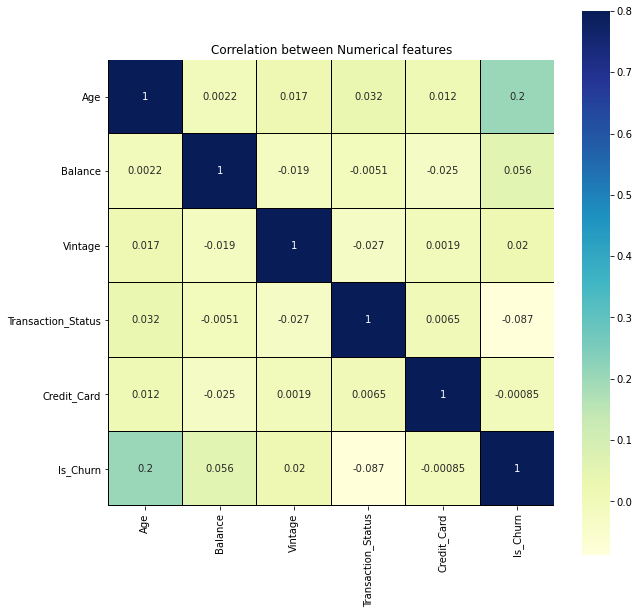

In [375]:
#Check corelation primarily between Numerical linear features and target variable
#Correlation is a measure used to represent how strongly two random variables are related to each other.
#Correlation ranges between -1 and +1
corr = df.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between Numerical features')

<b>Positively correlated with Is_churn</b>
<ul>
    <li>Age
    <li>Balance
    <li>Vintage
</ul>
<b>Negatively correlated with Is_churn</b>
<ul>
    <li>Transaction Status
    <li>Credit Card
</ul>


<a name = Section7></a>

---
# **7. Data Post-Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features as necessary and manipulate any column as necessary

In [376]:
df.shape

(6650, 11)

In [377]:
# # applying one-hot encoding for Training and Validation Dataset
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical = df.loc[:, ['Gender','Income','Credit_Category','Product_Holdings']]
encoded_data = ohe.fit_transform(categorical)
cols = ohe.get_feature_names(['Gender','Income','Credit_Category','Product_Holdings'])
encoded_features = pd.DataFrame(encoded_data.todense(), columns=cols)

In [378]:
encoded_features.shape

(6650, 12)

In [379]:
encoded_features.head(10)

,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [380]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            6650 non-null   float64
 1   Gender_Male              6650 non-null   float64
 2   Income_10L - 15L         6650 non-null   float64
 3   Income_5L - 10L          6650 non-null   float64
 4   Income_Less than 5L      6650 non-null   float64
 5   Income_More than 15L     6650 non-null   float64
 6   Credit_Category_Average  6650 non-null   float64
 7   Credit_Category_Good     6650 non-null   float64
 8   Credit_Category_Poor     6650 non-null   float64
 9   Product_Holdings_1       6650 non-null   float64
 10  Product_Holdings_2       6650 non-null   float64
 11  Product_Holdings_3+      6650 non-null   float64
dtypes: float64(12)
memory usage: 623.6 KB


In [381]:
#Merging the Categorical encoded columns with the main dataframe
finalX = pd.merge(df,encoded_features,left_index=True,right_index=True, how="inner")
finalX.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [382]:
finalX.drop(['Credit_Category','Income','Gender','Product_Holdings','ID'],axis=1,inplace=True)

In [383]:
finalX.columns

Index(['Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card',
       'Is_Churn', 'Gender_Female', 'Gender_Male', 'Income_10L - 15L',
       'Income_5L - 10L', 'Income_Less than 5L', 'Income_More than 15L',
       'Credit_Category_Average', 'Credit_Category_Good',
       'Credit_Category_Poor', 'Product_Holdings_1', 'Product_Holdings_2',
       'Product_Holdings_3+'],
      dtype='object')

In [384]:
finalX.shape

(6650, 18)

In [385]:
finalX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      6650 non-null   int64  
 1   Balance                  6650 non-null   float64
 2   Vintage                  6650 non-null   int64  
 3   Transaction_Status       6650 non-null   int64  
 4   Credit_Card              6650 non-null   int64  
 5   Is_Churn                 6650 non-null   int64  
 6   Gender_Female            6650 non-null   float64
 7   Gender_Male              6650 non-null   float64
 8   Income_10L - 15L         6650 non-null   float64
 9   Income_5L - 10L          6650 non-null   float64
 10  Income_Less than 5L      6650 non-null   float64
 11  Income_More than 15L     6650 non-null   float64
 12  Credit_Category_Average  6650 non-null   float64
 13  Credit_Category_Good     6650 non-null   float64
 14  Credit_Category_Poor    

In [386]:
#sSelecting columns for X
finalX.drop(['Is_Churn'],axis=1,inplace=True)

In [387]:
#Selecting the Target Column
y=df.Is_Churn

<a name = Section72></a>
### **7.2 Data Preparation**

- Now we will **split** our **data** into **dependent** and **independent** variables for further development using holdout validation technique.

In [388]:
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression  
# Splitting data into training and testing sets with using Validation Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
#X_train.columns
X_train.head()

X_train shape:  (4987, 17)
y_train shape:  (4987,)
X_test shape:  (1663, 17)
y_test shape:  (1663,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 3243 to 4878
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4987 non-null   int64  
 1   Balance                  4987 non-null   float64
 2   Vintage                  4987 non-null   int64  
 3   Transaction_Status       4987 non-null   int64  
 4   Credit_Card              4987 non-null   int64  
 5   Gender_Female            4987 non-null   float64
 6   Gender_Male              4987 non-null   float64
 7   Income_10L - 15L         4987 non-null   float64
 8   Income_5L - 10L          4987 non-null   float64
 9   Income_Less than 5L      4987 non-null   float64
 10  Income_More than 15L     4987 non-null   float64
 11  Credit_Category_Average  4987 non-null   float64
 12  Credit_Category_Good     4987

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Female,Gender_Male,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
3243,47,1482588.54,4,1,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3048,42,863221.32,0,0,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1902,58,1247566.23,3,1,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4175,29,376395.57,4,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1096,49,1348761.15,3,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


<a name = Section73></a>
### **7.3 Data Scaling**

- Here we can try various scaling options available to arrive at best option
- Here I have decided to not do scaling as of now after trying with different scaling options

In [389]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


scaler_rbs = StandardScaler()
X_train_rbs = scaler_rbs.fit_transform(X_train)
X_test_rbs = scaler_rbs.transform(X_test)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop a Logistic Regression model**

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **F1 Score** score as required by this project.

<a name = Section81></a>
### **8.1 Baseline Model Development & Evaluation**

- Here we will develop Logistic Regression classification model using default setting.

In [390]:
# Instantiate a Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_rbs,y_train)

# Predicting training and testing labels
y_train_pred_count = logreg.predict(X_train_rbs)
y_test_pred_count = logreg.predict(X_test_rbs)


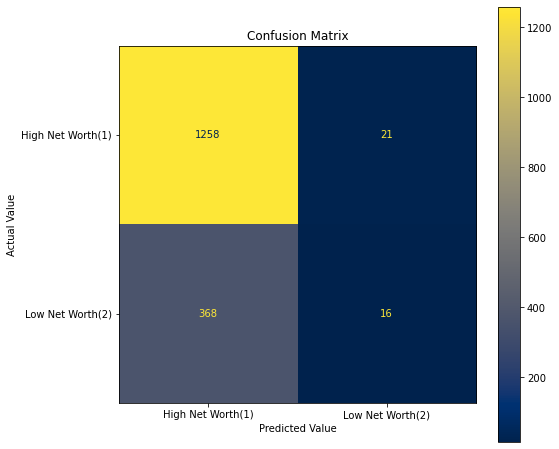

In [391]:
#Print confusion matrix for Test Validation Data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred_count,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
fig, ax = plt.subplots(figsize=(8,8))

disp.plot(cmap='cividis', values_format='d', ax=ax)
ax.set_xlabel('Predicted Value');ax.set_ylabel('Actual Value'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['High Net Worth(1)', 'Low Net Worth(2)']); ax.yaxis.set_ticklabels(['High Net Worth(1)', 'Low Net Worth(2)']);

In [392]:
print(' Accuracy score for test validation data is:', accuracy_score(y_test,y_test_pred_count),
      '\n','#########################################################','\n'
   ' Precision score for test validation data is :', precision_score(y_test,y_test_pred_count),'\n',
      'Recall score for test validation data is :', recall_score(y_test,y_test_pred_count),'\n',
      '#########################################################','\n',
      'F1 score for test validation data is :', f1_score(y_test,y_test_pred_count))

 Accuracy score for test validation data is: 0.7660853878532772 
 ######################################################### 
 Precision score for test validation data is : 0.43243243243243246 
 Recall score for test validation data is : 0.041666666666666664 
 ######################################################### 
 F1 score for test validation data is : 0.07600950118764845


In [393]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Data Report          ')
print(train_report)
print('                    Test Validation Data Report           ')
print(test_report)

                    Training Data Report          
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3834
           1       0.54      0.06      0.11      1153

    accuracy                           0.77      4987
   macro avg       0.66      0.52      0.49      4987
weighted avg       0.72      0.77      0.69      4987

                    Test Validation Data Report           
              precision    recall  f1-score   support

           0       0.77      0.98      0.87      1279
           1       0.43      0.04      0.08       384

    accuracy                           0.77      1663
   macro avg       0.60      0.51      0.47      1663
weighted avg       0.69      0.77      0.68      1663



In [394]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.pipeline import Pipeline
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeDT = Pipeline(( 
("DT",DecisionTreeClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeDT.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeDT.score(X_test,y_test))
print("Training Accuracy")
print(pipeDT.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeDT, X_train, y_train, cv=10,scoring='f1_macro')
print()
print("Average f1_macro")
print(np.mean(scores))

Testing Accuracy
0.7630787733012627
Training Accuracy
0.7786244235011028

Average f1_macro
0.478930463141052


In [395]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.pipeline import Pipeline
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeGNB = Pipeline(( 
("DT",GaussianNB()) ,    
))
pipeGNB.fit(X_train,y_train)
print("Testing Accuracy")
print(pipeGNB.score(X_test,y_test))
print("Training Accuracy")
print(pipeGNB.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeGNB, X_train, y_train, cv=10,scoring='f1_macro')
print()
print("Average f1_macro")
print(np.mean(scores))

Testing Accuracy
0.7690920024052916
Training Accuracy
0.7687988770804091

Average f1_macro
0.434644521023149


In [396]:
from sklearn import model_selection
from xgboost import XGBClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
kfold = model_selection.KFold(n_splits=10)
pipeXGB = Pipeline(( 
("XGB",XGBClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeXGB.fit(X_train_rbs,y_train)
print("Testing Accuracy")
print(pipeXGB.score(X_test_rbs,y_test))
print("Training Accuracy")
print(pipeXGB.score(X_train_rbs,y_train))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeXGB, X_train_rbs, y_train, cv=10,scoring='f1_macro')
print()
print("Average f1_macro")
print(np.mean(scores))

[14:58:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Testing Accuracy
0.7594708358388454
Training Accuracy
0.8562261880890315
[14:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:58:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavio

In [397]:
from sklearn.ensemble import RandomForestClassifier

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipeRF = Pipeline(( 
("RF",RandomForestClassifier(random_state = 42, max_depth = 5)) ,    
))
pipeRF.fit(X_train,y_train)

print("Testing Accuracy")
print(pipeRF.score(X_test,y_test))
print("Training Accuracy")
print(pipeRF.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipeRF, X_train, y_train, cv=10,scoring='f1_macro')
print()
print("Average f1_macro")
print(np.mean(scoresknn))

Testing Accuracy
0.7684906794948888
Training Accuracy
0.7700020052135552

Average f1_macro
0.4381398291325994


In [398]:
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
pipe = Pipeline((
("sc",RobustScaler()),    
("knn",KNeighborsClassifier(n_neighbors=10)) ,    
))
pipe.fit(X_train,y_train)
print("Testing Accuracy")

print(pipe.score(X_test,y_test))
print("Training Accuracy")
print(pipe.score(X_train,y_train))
from sklearn.model_selection import cross_val_score
scoresknn = cross_val_score(pipe, X_train, y_train, cv=10,scoring='f1_macro')
print()
print("Average f1_macro")
print(np.mean(scoresknn))

Testing Accuracy
0.7630787733012627
Training Accuracy
0.7776218167234811

Average f1_macro
0.4614975101694223


In [416]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,eval_metric='logloss')
parameters = {'n_estimators':[50,100,200],'max_depth':[3,4,5,6],'learning_rate':[0.1,0.01]}
model_xgb_grid = GridSearchCV(model_xgb, parameters,cv=10,verbose=1).fit(X_train,y_train)
print(model_xgb_grid.best_params_)

print('XGB Classifier Cros validation score:',model_xgb_grid.best_score_*100)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.9min finished


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
XGB Classifier Cros validation score: 77.16066671495601


In [422]:
model_xgb=XGBClassifier(n_jobs=-1,random_state=42,n_estimators=200,max_depth=3,learning_rate=0.1,eval_metric='logloss')
model_xgb.fit(X_train,y_train)
s=model_xgb.score(X_train,y_train)
print('XGB Classifier Classifier Train score:',model_xgb.score(X_train,y_train)*100)
s = cross_val_score(pipe, X_train, y_train, cv=10,scoring='f1_macro')
print(np.mean(s))

XGB Classifier Classifier Train score: 78.72468417886505
0.4614975101694223


In [424]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\shahk\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=33a5885cf0e0283bdb5ee1365ac86177ed1021cf991bf76781527631349989bc
  Stored in directory: c:\users\shahk\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2


In [423]:
import tensorflow as tf
model_dnn=tf.keras.Sequential()

model_dnn.add(tf.keras.layers.Dense(25,activation='relu',input_dim=11))
model_dnn.add(tf.keras.layers.Dropout(0.5))
model_dnn.add(tf.keras.layers.Dense(10,activation='relu'))
model_dnn.add(tf.keras.layers.Dropout(0.3))
model_dnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model_dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=['f1_macro'])

ModuleNotFoundError: No module named 'tensorflow'

- Best macro F1 score is from XGBoostClassifier, Hence we will use it's model for Test data 

# Test data

In [412]:
#Reading Test Data
df = pd.read_csv("https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/test_Data_AV.csv?raw=true")

# Get the dimesions of data
print('Shape of the Test Data:', df.shape)

# Output first 5 data rows
df.head()

Shape of the Test Data: (2851, 10)


,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [413]:
any(df.isna().sum())

False

In [401]:
#Applying data processing on test data
ohe = OneHotEncoder()
categorical = df.loc[:, ['Gender','Income','Credit_Category','Product_Holdings']]

encoded_data = ohe.fit_transform(categorical)
cols = ohe.get_feature_names(['Gender','Income','Credit_Category','Product_Holdings'])
encoded_features = pd.DataFrame(encoded_data.todense(), columns=cols)

In [402]:
encoded_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Female            2851 non-null   float64
 1   Gender_Male              2851 non-null   float64
 2   Income_10L - 15L         2851 non-null   float64
 3   Income_5L - 10L          2851 non-null   float64
 4   Income_Less than 5L      2851 non-null   float64
 5   Income_More than 15L     2851 non-null   float64
 6   Credit_Category_Average  2851 non-null   float64
 7   Credit_Category_Good     2851 non-null   float64
 8   Credit_Category_Poor     2851 non-null   float64
 9   Product_Holdings_1       2851 non-null   float64
 10  Product_Holdings_2       2851 non-null   float64
 11  Product_Holdings_3+      2851 non-null   float64
dtypes: float64(12)
memory usage: 267.4 KB


In [403]:
finalX = pd.merge(df,encoded_features,left_index=True,right_index=True, how="inner")
finalX.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,...,Income_10L - 15L,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Category_Average,Credit_Category_Good,Credit_Category_Poor,Product_Holdings_1,Product_Holdings_2,Product_Holdings_3+
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [404]:
finalX.drop(['Credit_Category','Income','Gender','ID','Product_Holdings'],axis=1,inplace=True)

In [405]:
finalX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2851 non-null   int64  
 1   Balance                  2851 non-null   float64
 2   Vintage                  2851 non-null   int64  
 3   Transaction_Status       2851 non-null   int64  
 4   Credit_Card              2851 non-null   int64  
 5   Gender_Female            2851 non-null   float64
 6   Gender_Male              2851 non-null   float64
 7   Income_10L - 15L         2851 non-null   float64
 8   Income_5L - 10L          2851 non-null   float64
 9   Income_Less than 5L      2851 non-null   float64
 10  Income_More than 15L     2851 non-null   float64
 11  Credit_Category_Average  2851 non-null   float64
 12  Credit_Category_Good     2851 non-null   float64
 13  Credit_Category_Poor     2851 non-null   float64
 14  Product_Holdings_1      

In [406]:
#scaling the data for XGBoost
scaler_rbs = StandardScaler()
X_train_rbs = scaler_rbs.fit_transform(finalX)


In [407]:
#predicing 
y_pred_final=pipeXGB.predict(X_train_rbs)

In [408]:
#converting to dataframe
df3 = pd.DataFrame({"ID":df.ID,"Is_Churn":y_pred_final})

In [409]:
#Converting to CSV
df3.to_csv('cust_Churn_output.csv',index=False)

In [410]:
df3.Is_Churn.value_counts()

0    2682
1     169
Name: Is_Churn, dtype: int64

In [411]:
df3.shape

(2851, 2)

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- XGBoost model was used for model evaluation and prediction as it gave the best macro F1 score
- Macro F1 Score was used to arrive at model evaluation which is required for this Project
- One-Hot Encoding using one hot encoder was used
- StandardScaler scaling provided best Macro F1 Score for this dataset

### **Please refer my techinal report in PDF form**
https://github.com/kings-shah/Customer_Churn_Analytics_Vidhya/blob/main/Customer%20churn.pdf
